In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_df.csv')

In [3]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,rating_value,nr_entities,num_words
count,66193.000000,66193.000000,66193.00000,66193.000000,66193.000000,66193.000000
mean,38397.607859,41012.690390,3333.34626,1.293143,2.170894,16.740275
std,20208.095839,22368.447114,2493.98657,1.031867,1.511322,7.875774
min,0.000000,0.000000,0.00000,-1.000000,0.000000,3.000000
25%,21030.000000,22642.000000,1282.00000,1.000000,1.000000,11.000000
50%,38418.000000,43534.000000,2737.00000,1.000000,2.000000,15.000000
75%,56003.000000,60226.000000,5017.00000,2.000000,3.000000,21.000000
max,73245.000000,76840.000000,9999.00000,3.000000,19.000000,168.000000


In [4]:
df.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,claim,text,organization,lang_name,rating_label,rating_value,entity_strings,entities,nr_entities,num_words,probable_lang
66188,73238,32810,560,http://data.gesis.org/claimskg/creative_work/8...,BOILER CHICKEN ME KORONA VIRUS KO PAYA GAYA HA...,Vishvanews,English,FALSE,1,"Appeal, CHICKEN, DUAA, GAYA, HAI, KA, KARE, KE...","['Appeal', ' CHICKEN', ' DUAA', ' GAYA', ' HAI...",16.0,34,en
66189,73240,35869,3619,http://data.gesis.org/claimskg/creative_work/b...,Anyone who has been vaccinated against coronav...,Vishvanews,English,FALSE,1,"Pharmacy, administer, anesthetic, anesthetics,...","['Pharmacy', ' administer', ' anesthetic', ' a...",18.0,134,en
66190,73242,34341,2091,http://data.gesis.org/claimskg/creative_work/1...,【Vaccination Warning】 Anyone who has been vacc...,Vishvanews,English,FALSE,1,"Pharmacy, administer, anesthetic, anesthetics,...","['Pharmacy', ' administer', ' anesthetic', ' a...",18.0,136,en
66191,73244,36118,3868,http://data.gesis.org/claimskg/creative_work/5...,“…Progressive students of #JNU opposed Hindu w...,Vishvanews,English,FALSE,1,"Hindu, Hindu culture, Hindu society, Hindutva,...","['Hindu', ' Hindu culture', ' Hindu society', ...",19.0,69,en
66192,73245,34469,2219,http://data.gesis.org/claimskg/creative_work/b...,Please note the differences: (1) dry cough + s...,Vishvanews,English,FALSE,1,"AIIMS, Cough, Delhi, Dry cough, Make, Patholog...","['AIIMS', ' Cough', ' Delhi', ' Dry cough', ' ...",19.0,75,en


In [5]:
# new column with number of words per claim
# simply split between whitespaces, no sophisticated method needed to get an overview
df['claim_length'] = df['text'].str.split(' ')
df['claim_length'].fillna(-1)
df['claim_length'] = df['claim_length'].str.len()

In [6]:
plt.style.use('ggplot')

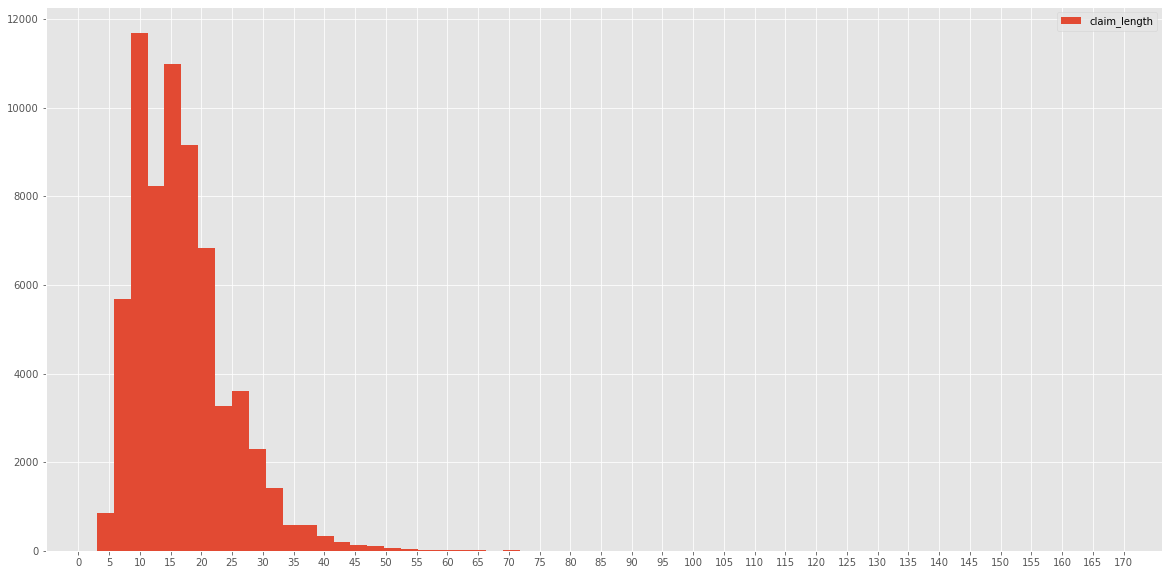

In [7]:
axes = df.claim_length.hist(bins = 60, figsize=(20, 10), legend=True)
plt.xticks(range(0, 175, 5))
plt.show()

In [8]:
df.claim_length.describe()

count    66193.000000
mean        16.740275
std          7.875774
min          3.000000
25%         11.000000
50%         15.000000
75%         21.000000
max        168.000000
Name: claim_length, dtype: float64

In [9]:
# drop the longest 5% of claims for better visibility
largest95_claim_length = df.nsmallest(int(len(df) * 0.95), 'claim_length')

In [10]:
largest95_claim_length.claim_length.describe()

count    62883.000000
mean        15.625161
std          6.009732
min          3.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         31.000000
Name: claim_length, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


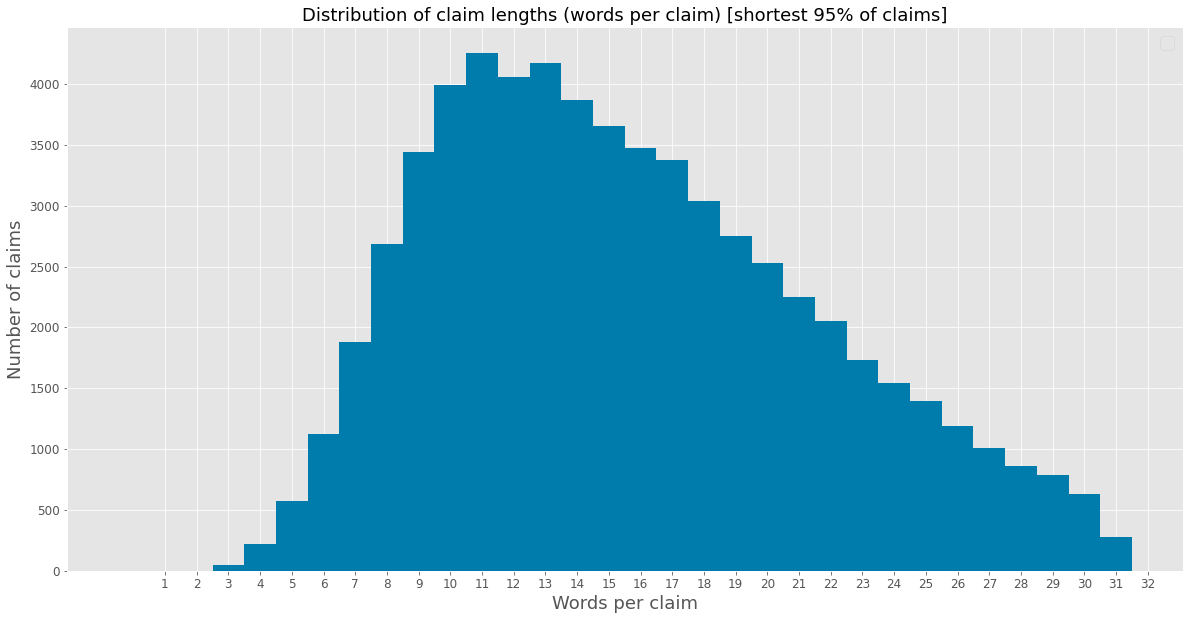

In [11]:
# visualize distribution of claim lengths
largest95_claim_length.claim_length.hist(bins = np.arange(33)-0.5, figsize=(20, 10), xlabelsize='large', ylabelsize='larger', legend=False, color='#007cac')
plt.xticks(np.arange(1, 33))
plt.xlabel('Words per claim', fontsize=18)
plt.ylabel('Number of claims', fontsize=18)
plt.title('Distribution of claim lengths (words per claim) [shortest 95% of claims]', fontsize=18)
plt.legend(fontsize='xx-large')
plt.show()

In [12]:
# new columns with number of entities per claim
df['nr_entities_claim'] = df['entities'].str.split(',')
df['nr_entities_claim'] = df['nr_entities_claim'].str.len()
df.fillna({'nr_entities_claim': 0}, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


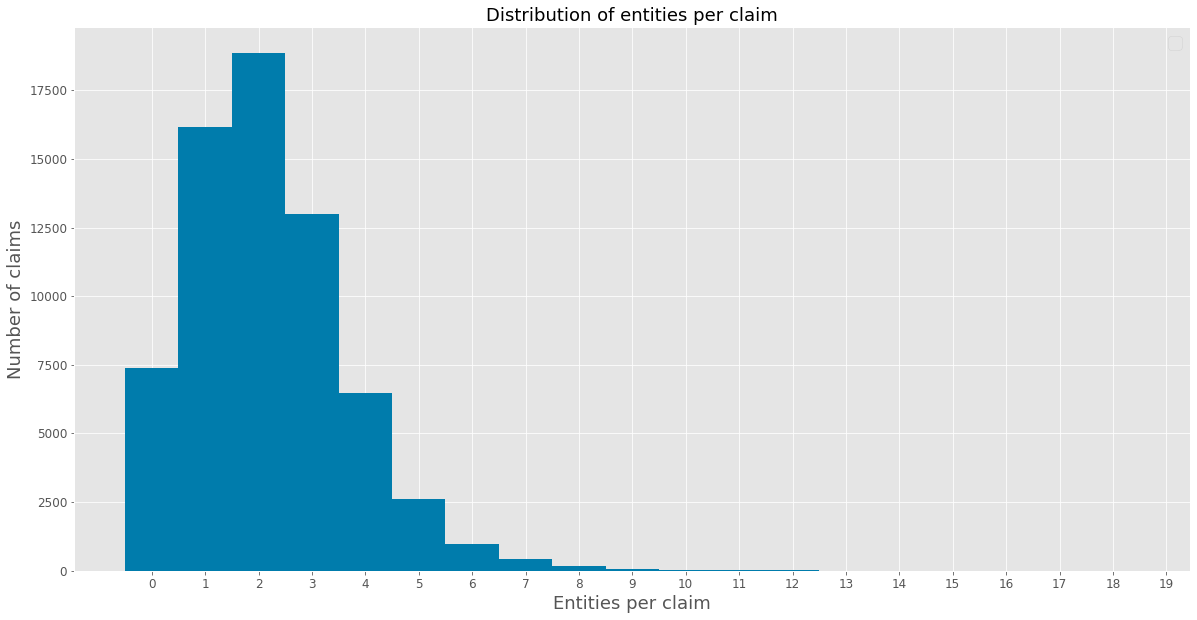

In [13]:
# visualize distribution of number of entities per claim
df.nr_entities_claim.hist(bins=np.arange(0, 20)-0.5, figsize=(20, 10), xlabelsize='large', ylabelsize='larger', legend=False, color='#007cac')
plt.xticks(np.arange(0, 20))
plt.xlabel('Entities per claim', fontsize=18)
plt.ylabel('Number of claims', fontsize=18)
plt.title('Distribution of entities per claim', fontsize=18)
plt.legend(fontsize='xx-large')
plt.show()

In [14]:
from collections import Counter

In [15]:
# new column 'entities' generated by splitting entity_strings column of type str into list
df['entities'] = df.entity_strings.str.split(',')

In [16]:
entities = df.entities.dropna()

In [17]:
# get counts of how often entities occur in the dataset
c = Counter(e.lower().strip() for entity_list in entities for e in entity_list)
for (count, value) in c.most_common(15):
    print(count, value)

facebook 4504
covid-19 1270
donald trump 952
u.s. 934
texas 721
president donald trump 721
joe biden 651
united states 623
hillary clinton 597
kenya 582
china 567
florida 550
president obama 549
nigeria 487
wisconsin 485


In [18]:
# get only the frequency values
value_list = list(c.values())

In [19]:
# only values greater than 1, for better readability of the resulting histogram
value_list_no1 = list(filter(lambda x: x != 1, value_list))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


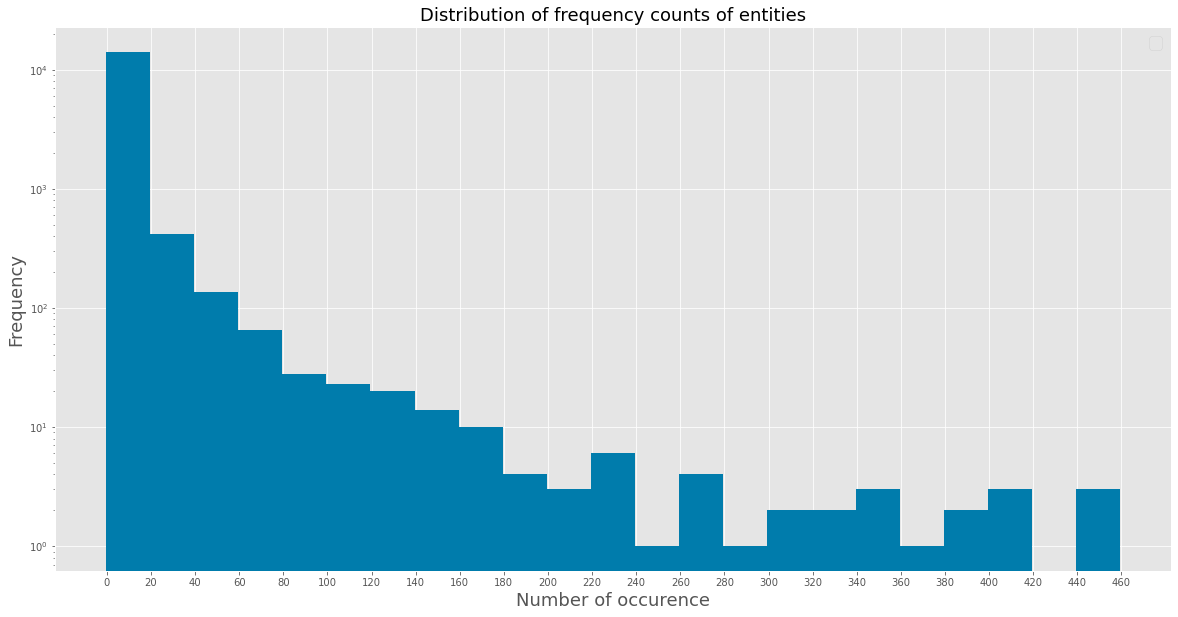

In [21]:
# plot distribution of frequency values
plt.hist(value_list_no1, color='#007cac', bins=np.arange(0, 480, 20)-0.5,)
plt.xticks(range(0, 480, 20))
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel('Number of occurence', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of frequency counts of entities', fontsize=18)
plt.legend(fontsize='xx-large')
plt.show()